# Glass Identification

## Project Description

The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

The chemical compositions are measured as the weight percent in corresponding oxide.

Attribute Information-

    1.	 Id number: 1 to 214
   
    2.	 RI: refractive index
    
    3.	Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
    
    4.	Mg: Magnesium
    
    5.	Al: Aluminum
    
    6.	Si: Silicon
    
    7.	K: Potassium
    
    8.	Ca: Calcium
    
    9.	Ba: Barium
    
    10.	Fe: Iron
    
    11.	Type of glass: (class attribute)
 
 Class labels:
 
    •	1- building_windows_float_processed

    •	2- building_windows_non_float_processed

    •	3- vehicle_windows_float_processed

    •	4- vehicle_windows_non_float_processed (none in this database)

    •	5- containers

    •	6- tableware

    •	7- headlamps
There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 


### Objective: To predict type of glass

### Dataset Link-
•	https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Glass%20Identification/Glass%20Identification.csv


In [161]:
# Import dependencies
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [162]:
os.chdir("F:\\FlipRobo\\Projects\\Glass Identification\\")  # Change the current working directory

df = pd.read_csv('Glass Identification.csv')       # Read the CSV file and set specified columns as index
df.columns = ['Id', 'RI', 'Sodium', 'Magnesium', 'Aluminum', 'Silicon', 'Potassium', 'Calcium', 'Barium', 'Iron', 'Type of glass']

df.head()  # Display the first five rows of the DataFrame


,Id,RI,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type of glass
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [163]:
df.shape

(213, 11)

In [164]:
df.columns

Index(['Id', 'RI', 'Sodium', 'Magnesium', 'Aluminum', 'Silicon', 'Potassium',
       'Calcium', 'Barium', 'Iron', 'Type of glass'],
      dtype='object')

## Exploratory data analysis

### Dropping the column "Id"

In [165]:
df1=df.drop(columns='Id',inplace=False)

In [166]:
df1.head()

,RI,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type of glass
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


#### Observation: Column "Id" dropped from the dataframe

In [167]:
df1.isnull().sum()

RI               0
Sodium           0
Magnesium        0
Aluminum         0
Silicon          0
Potassium        0
Calcium          0
Barium           0
Iron             0
Type of glass    0
dtype: int64

#### Observation: There are no missing values.

In [168]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RI             213 non-null    float64
 1   Sodium         213 non-null    float64
 2   Magnesium      213 non-null    float64
 3   Aluminum       213 non-null    float64
 4   Silicon        213 non-null    float64
 5   Potassium      213 non-null    float64
 6   Calcium        213 non-null    float64
 7   Barium         213 non-null    float64
 8   Iron           213 non-null    float64
 9   Type of glass  213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


#### Observation: There are no categorical variables.

In [169]:
df1.nunique()

RI               177
Sodium           142
Magnesium         93
Aluminum         117
Silicon          132
Potassium         65
Calcium          143
Barium            34
Iron              32
Type of glass      6
dtype: int64

#### Observation: Here, the type of glass is only discrete variable. Rest all are continuos variables.


### Visualization

### Histogram: To check for the skewness of the continuous variables

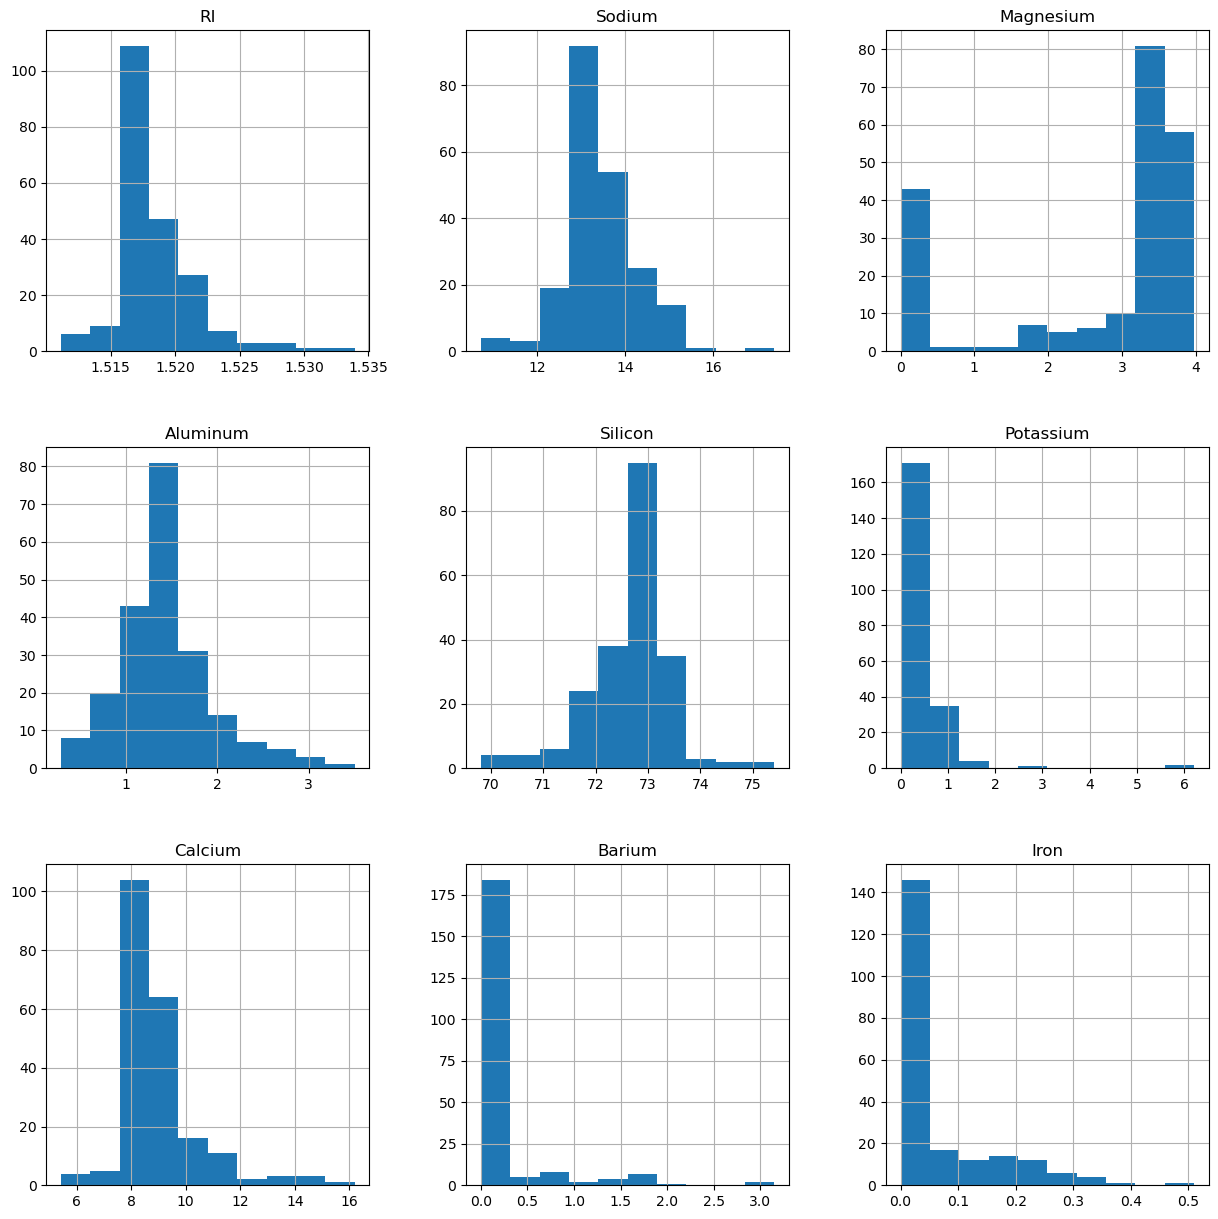

In [170]:
df1.hist(column=['RI', 'Sodium', 'Magnesium', 'Aluminum', 'Silicon', 'Potassium', 'Calcium', 'Barium', 'Iron'],figsize=(15,15))
plt.show()

In [171]:
df1[['RI', 'Sodium', 'Magnesium', 'Aluminum', 'Silicon', 'Potassium', 'Calcium', 'Barium', 'Iron']].skew()

RI           1.639658
Sodium       0.457318
Magnesium   -1.154323
Aluminum     0.900017
Silicon     -0.744546
Potassium    6.549276
Calcium      2.040591
Barium       3.406749
Iron         1.747173
dtype: float64

#### Observation: It is clear that there is a lot of skewness present in the variables.

### BoxCox transformation: To reduce skewness of the variables

In [172]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
from scipy.stats import boxcox
df2=pd.DataFrame()
for i in df1[['RI', 'Sodium', 'Magnesium', 'Aluminum', 'Silicon', 'Potassium', 'Calcium', 'Barium', 'Iron']]:
    coll, lambda_value = boxcox(df1[i]+1)
    df2[i]=coll
df2.skew()

RI           0.000000
Sodium      -0.009526
Magnesium   -0.911150
Aluminum     0.000874
Silicon      0.133867
Potassium   -0.075233
Calcium     -0.207808
Barium       1.817526
Iron         0.852473
dtype: float64

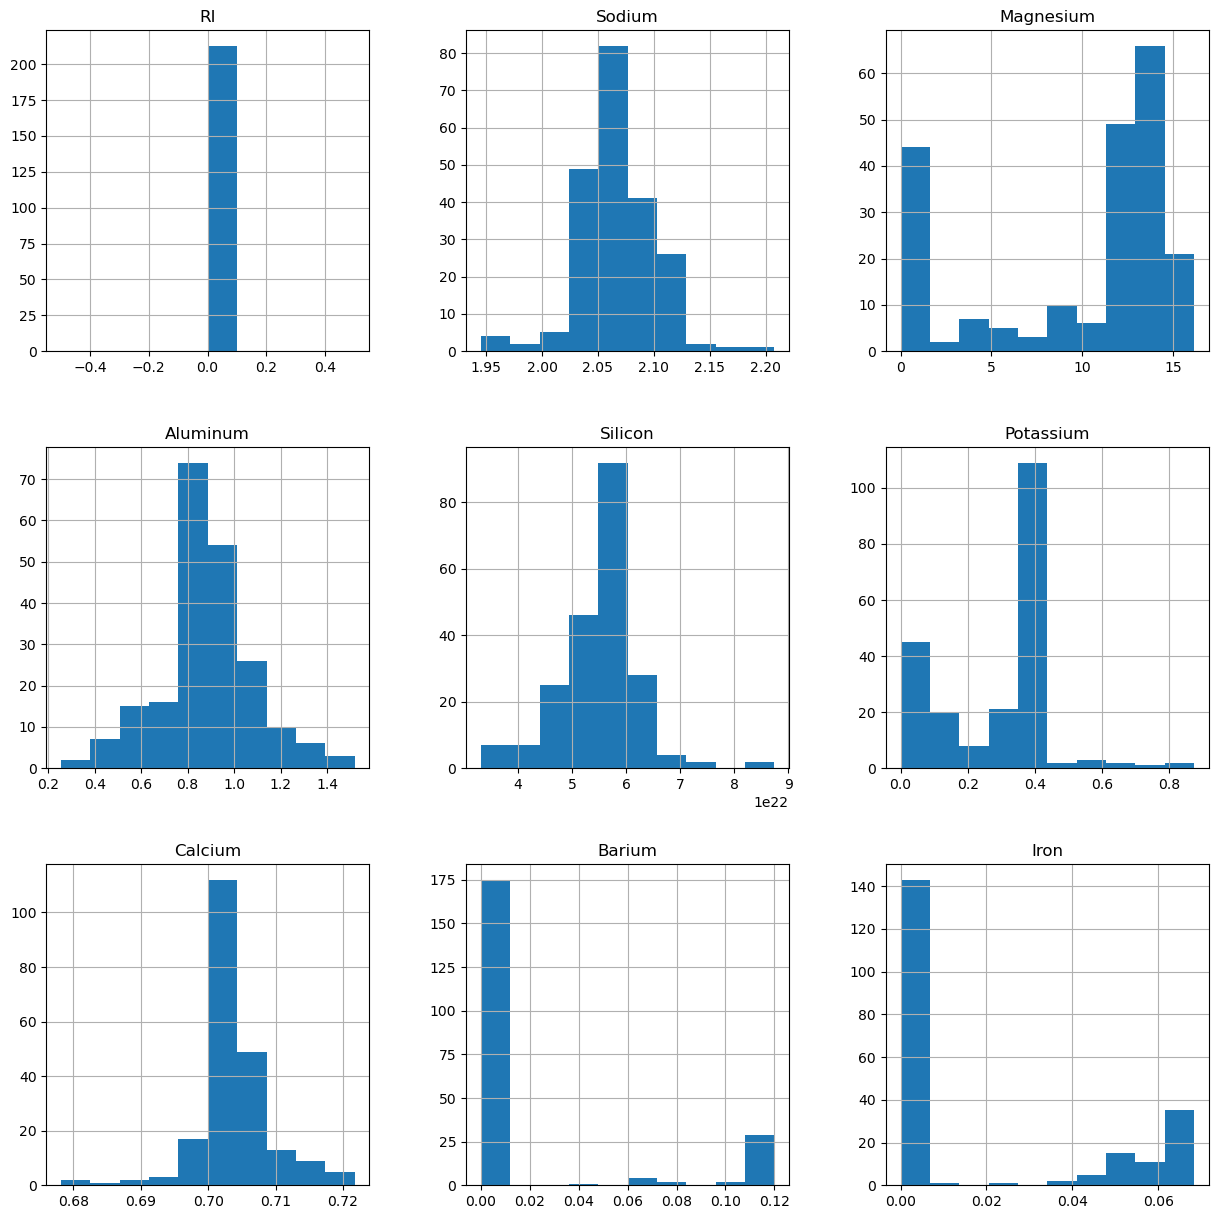

In [173]:
df2.hist(column=['RI', 'Sodium', 'Magnesium', 'Aluminum', 'Silicon', 'Potassium', 'Calcium', 'Barium', 'Iron'],figsize=(15,15))
plt.show()

#### Observation: Clearly, skewness of the variables have reduced after the BoxCox transformation

### Scatter plot and Heatmap: to check for multicollinearity

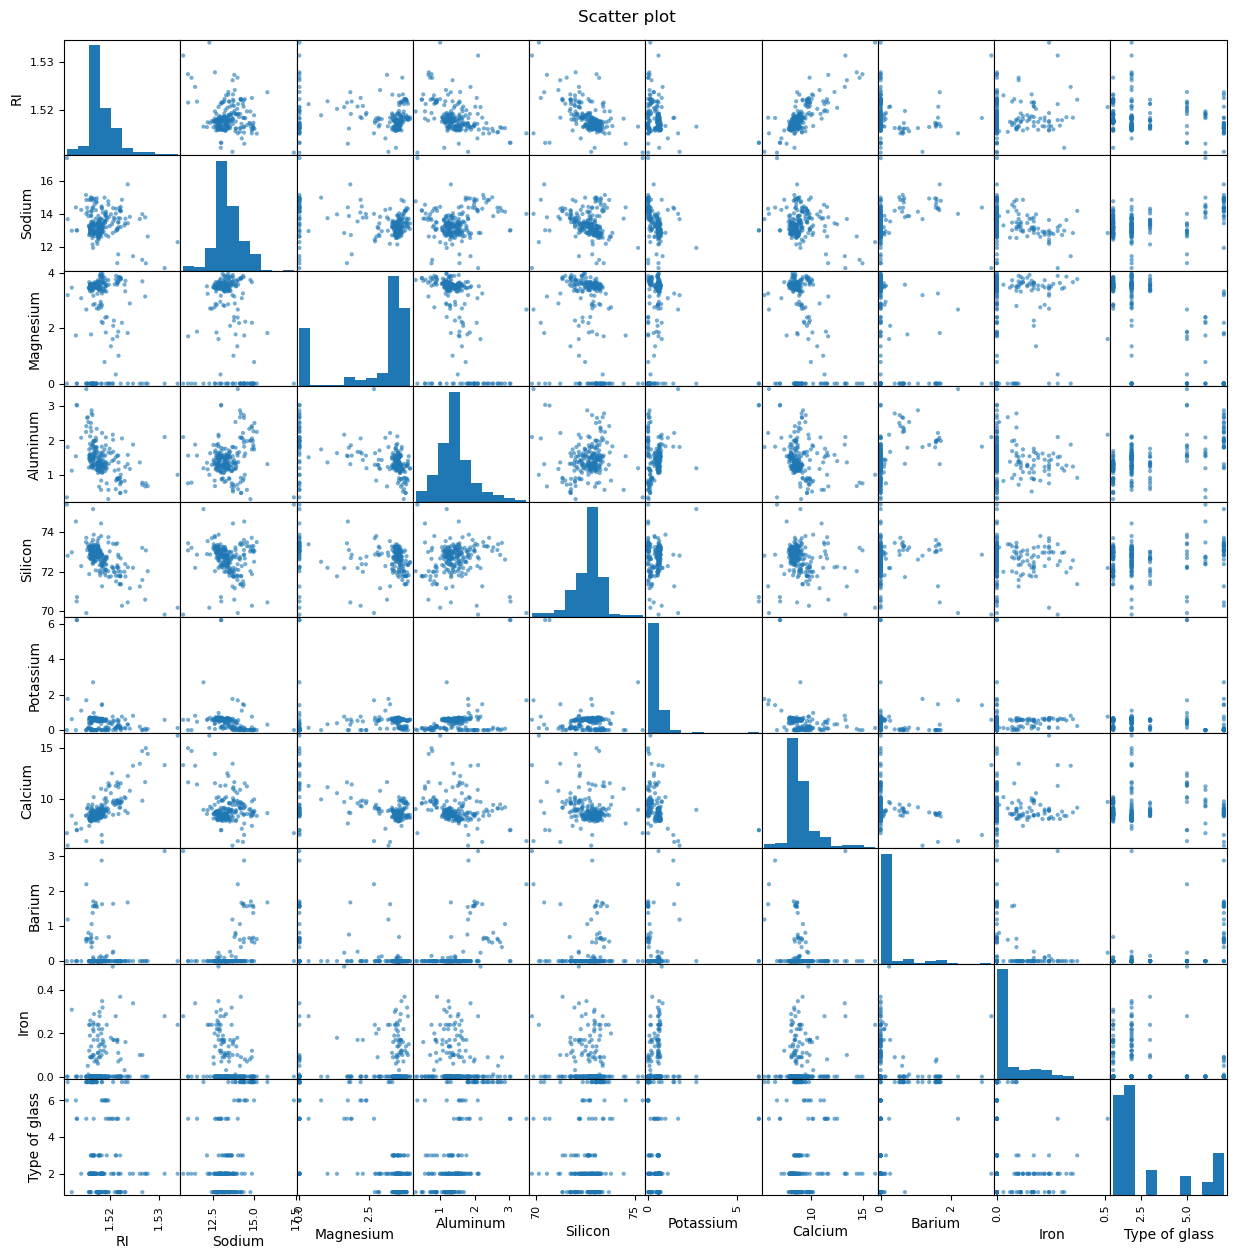

In [174]:
from pandas.plotting import scatter_matrix
scatter_matrix(df1, alpha=0.6, figsize=(15,15))
plt.suptitle('Scatter plot', y=0.9)  # Adjust the position of the title
plt.show()

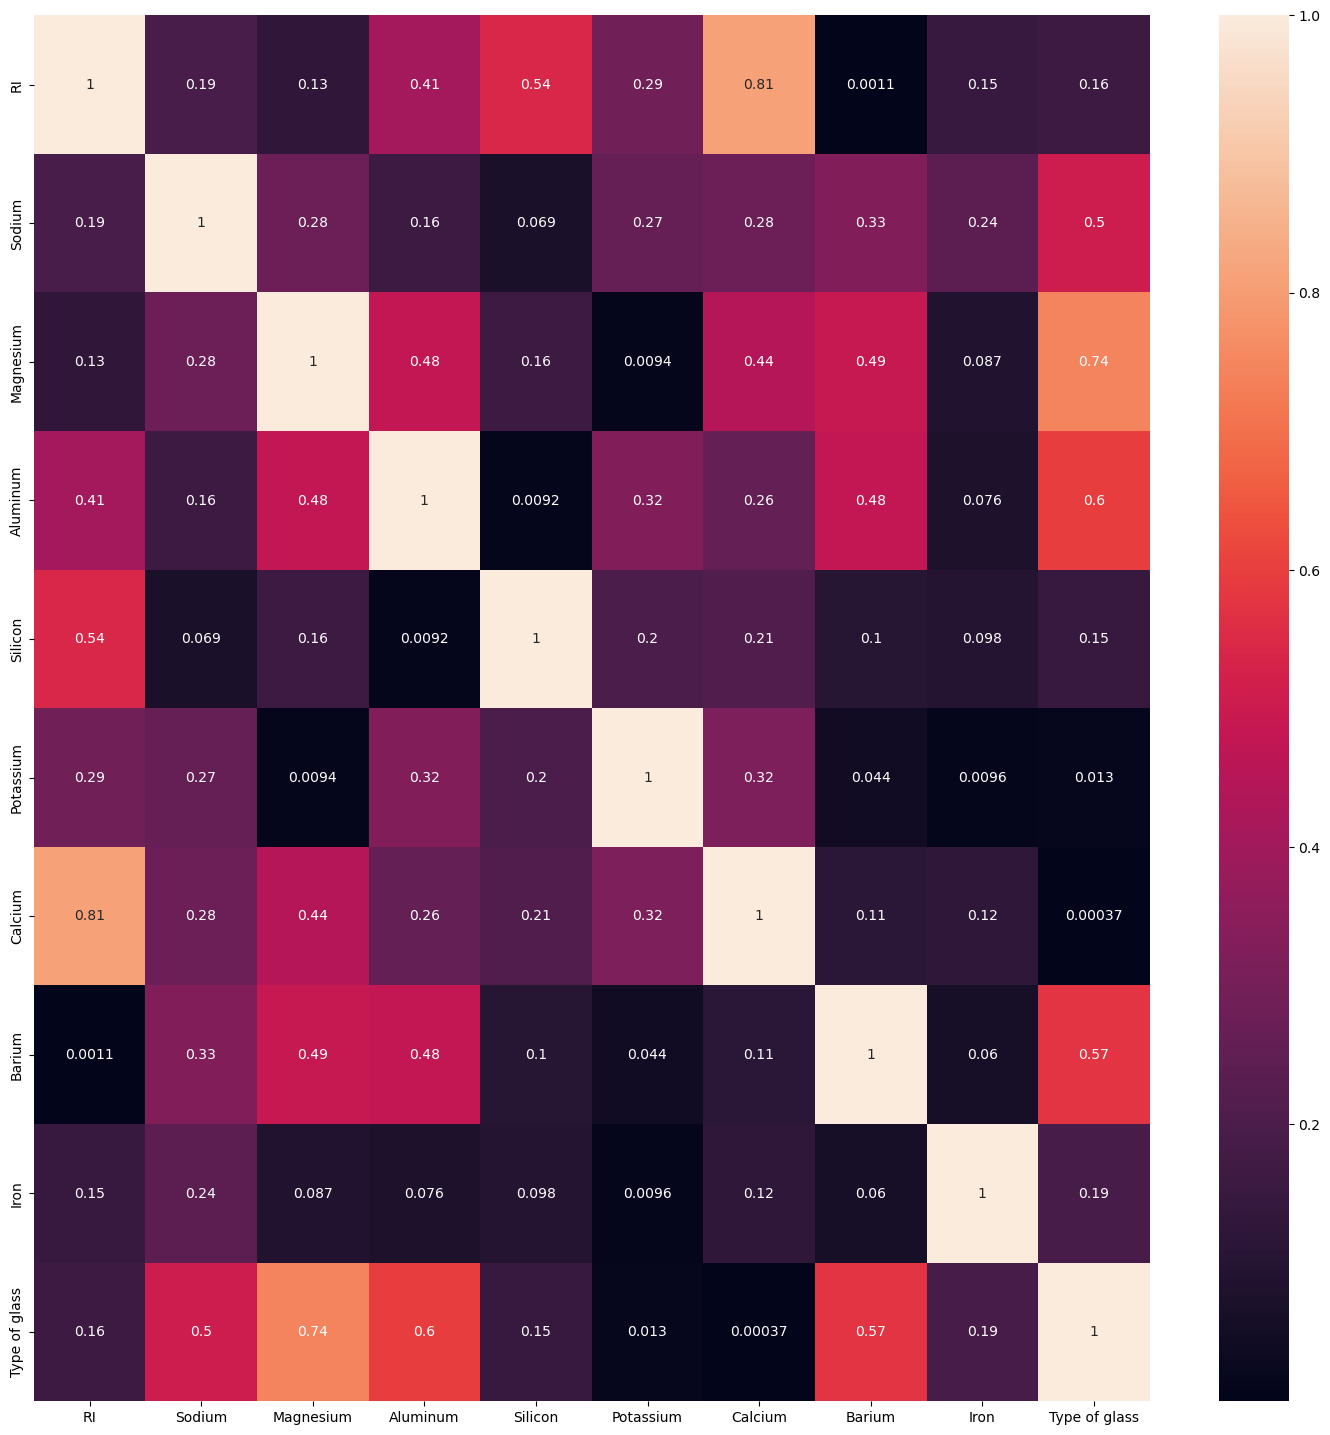

In [175]:
plt.figure(figsize=(18,18))
sns.heatmap(abs(df1.corr()), annot=True)
plt.show()

#### Observations:
####                        (i) "RI" is highly correlated with "Calcium"(= 0.81).
####                        (ii) "Magnesium" shows high correlation with "Type of glass" (= 0.74).

Next: Keeping the dataframe as it is. 

### Bar plot: To check the labels if there is imbalance

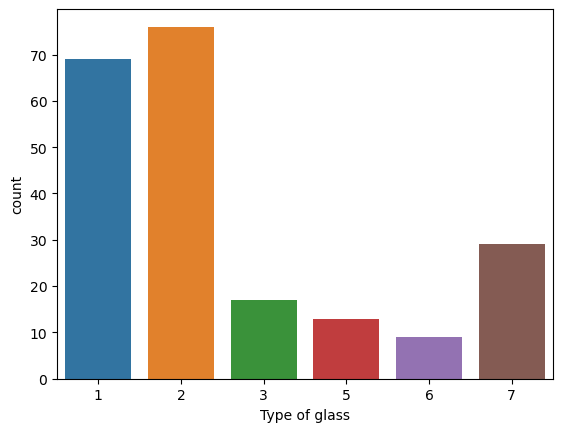

In [176]:
sns.countplot(x="Type of glass", data=df1)
plt.show()

In [177]:
df1["Type of glass"].value_counts()

2    76
1    69
7    29
3    17
5    13
6     9
Name: Type of glass, dtype: int64

#### Observation: There is a lot of imbalance in the class. There are some minority classes like class 6, class 5, and class 3.
    
Next: We need to make the class balanced.

### Splitting the dataset as features (X) and labels (y)

In [178]:
X=df2
y=df1["Type of glass"]
y.value_counts()

2    76
1    69
7    29
3    17
5    13
6     9
Name: Type of glass, dtype: int64

### SMOTE: to remove imbalance in the class

In [179]:
from imblearn.over_sampling import SMOTE

sm=SMOTE()
X,y=sm.fit_resample(X,y)

In [180]:
y.value_counts()

1    76
2    76
3    76
5    76
6    76
7    76
Name: Type of glass, dtype: int64

In [181]:
y.shape

(456,)

#### Observation: All the six classes are now in equal numbers. So the class is now balanced.

### Scale of the variables

In [182]:
X.describe()

,RI,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron
count,4.560000e+02,456.000000,456.000000,456.000000,4.560000e+02,456.000000,456.000000,456.000000,456.000000
mean,8.691398e-04,2.075467,7.321174,0.922165,5.539145e+22,0.233563,0.704574,0.023473,0.013673
std,3.473257e-18,0.035287,5.831549,0.208939,7.386345e+21,0.192423,0.005758,0.044847,0.023170
min,8.691398e-04,1.945130,0.000000,0.255052,3.307500e+22,0.000000,0.678193,0.000000,0.000000
25%,8.691398e-04,2.052300,0.579150,0.815099,5.214576e+22,0.009239,0.702112,0.000000,0.000000
50%,8.691398e-04,2.071296,6.493099,0.937676,5.541260e+22,0.281514,0.703982,0.000000,0.000000
75%,8.691398e-04,2.099967,13.033225,1.032558,5.907043e+22,0.369090,0.707647,0.000000,0.023473
max,8.691398e-04,2.207901,16.162453,1.518462,8.742176e+22,0.874039,0.721703,0.119982,0.068376


#### Observation: "RI" is of the order of 10^(-4), where as "Silicon" is of the order of 10^22. So there is too much difference in the scale of variables.

### Standard Scaler: Scaling the variables

In [183]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X1=scale.fit_transform(X)
X2=pd.DataFrame(X1,columns=X.columns)
X2

,RI,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron
0,-1.084202e-19,0.344984,1.050173,-0.281864,0.002866,0.478840,-0.995569,-0.523977,-0.590778
1,-1.084202e-19,-0.060994,0.992102,0.074318,0.348176,0.249468,-1.047217,-0.523977,-0.590778
2,-1.084202e-19,-0.432126,1.156714,-0.427676,-0.151740,0.682180,-0.615248,-0.523977,-0.590778
3,-1.084202e-19,-0.361780,1.073624,-0.534548,0.471075,0.639012,-0.756968,-0.523977,-0.590778
4,-1.084202e-19,-0.934743,1.061882,0.224688,0.321103,0.825061,-0.756968,-0.523977,2.269166
...,...,...,...,...,...,...,...,...,...
451,-1.084202e-19,0.828420,-0.366351,0.555347,0.233284,0.383693,-2.331921,2.151907,-0.590778
452,-1.084202e-19,0.405560,-0.658817,0.703268,0.498626,-1.188809,-0.178436,2.127722,-0.590778
453,-1.084202e-19,1.277067,-1.256821,1.726044,0.457021,-0.986077,-0.014673,2.090382,-0.590778
454,-1.084202e-19,1.159430,-1.256821,0.954911,1.174275,-1.215135,-0.425447,2.137660,-0.590778


In [184]:
X2.describe()

,RI,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron
count,4.560000e+02,4.560000e+02,4.560000e+02,4.560000e+02,4.560000e+02,4.560000e+02,4.560000e+02,4.560000e+02,4.560000e+02
mean,-1.084202e-19,-2.821330e-15,-2.899727e-16,-4.869399e-16,5.060523e-16,-4.109773e-16,1.789510e-14,-1.227089e-16,2.941117e-16
std,0.000000e+00,1.001098e+00,1.001098e+00,1.001098e+00,1.001098e+00,1.001098e+00,1.001098e+00,1.001098e+00,1.001098e+00
min,-1.084202e-19,-3.697723e+00,-1.256821e+00,-3.196357e+00,-3.024631e+00,-1.215135e+00,-4.586466e+00,-5.239770e-01,-5.907775e-01
25%,-1.084202e-19,-6.572620e-01,-1.157399e+00,-5.129861e-01,-4.399004e-01,-1.167070e+00,-4.279313e-01,-5.239770e-01,-5.907775e-01
50%,-1.084202e-19,-1.183337e-01,-1.421552e-01,7.431820e-02,2.866267e-03,2.494677e-01,-1.028803e-01,-5.239770e-01,-5.907775e-01
75%,-1.084202e-19,6.950777e-01,9.805841e-01,5.289324e-01,4.986257e-01,7.050923e-01,5.343182e-01,-5.239770e-01,4.234336e-01
max,-1.084202e-19,3.757202e+00,1.517777e+00,2.857056e+00,4.341185e+00,3.332140e+00,2.978060e+00,2.154320e+00,2.363588e+00


#### Observation: All the variables have been now got scaled with mean at 0.

## Model building

In [185]:
# Import Classification libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score,GridSearchCV

### Logistic Regression

### Random state: To find the best one

In [186]:
from sklearn.model_selection import train_test_split
maxAcc=0
for i in range(1000):
    X_train,X_test,y_train,y_test = train_test_split(X2,y, test_size=0.3,random_state=i)
    LR=LogisticRegression()
    model=LR.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    Acc=accuracy_score(y_pred,y_test)
    if Acc>maxAcc:
        maxAcc=Acc
        random=i
print(f'Max accuracy: {maxAcc}')
print(f'Best_random_state: {random}')

Max accuracy: 0.8175182481751825
Best_random_state: 146


In [187]:
X_train,X_test,y_train,y_test = train_test_split(X2,y, test_size=0.3,random_state=random)
LR=LogisticRegression()
model=LR.fit(X_train,y_train)
y_pred=model.predict(X_test)
Acc=accuracy_score(y_pred,y_test)
report=classification_report(y_pred,y_test)
conf_matrix=confusion_matrix(y_pred,y_test)
cv_score=cross_val_score(LR,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'Accuracy score : {Acc}')
print(f'Cross validation score: {cv_score}')
print(f'Classification report:\n {report}')

Accuracy score : 0.8175182481751825
Cross validation score: 0.6925403225806452
Classification report:
               precision    recall  f1-score   support

           1       0.67      0.63      0.65        19
           2       0.62      0.65      0.63        20
           3       0.55      0.55      0.55        20
           5       1.00      0.94      0.97        34
           6       1.00      1.00      1.00        20
           7       0.92      1.00      0.96        24

    accuracy                           0.82       137
   macro avg       0.79      0.80      0.79       137
weighted avg       0.82      0.82      0.82       137



### Decision Tree Classifier

In [188]:
X_train,X_test,y_train,y_test = train_test_split(X2,y, test_size=0.3,random_state=random)
DT=DecisionTreeClassifier()
model=DT.fit(X_train,y_train)
y_pred=model.predict(X_test)
Acc=accuracy_score(y_pred,y_test)
report=classification_report(y_pred,y_test)
conf_matrix=confusion_matrix(y_pred,y_test)
cv_score=cross_val_score(DT,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'Accuracy score : {Acc}')
print(f'Cross validation score: {cv_score}')
print(f'Classification report:\n {report}')

Accuracy score : 0.8613138686131386
Cross validation score: 0.7992943548387097
Classification report:
               precision    recall  f1-score   support

           1       0.50      0.60      0.55        15
           2       0.76      0.76      0.76        21
           3       0.90      0.72      0.80        25
           5       1.00      0.97      0.98        33
           6       1.00      1.00      1.00        20
           7       0.88      1.00      0.94        23

    accuracy                           0.86       137
   macro avg       0.84      0.84      0.84       137
weighted avg       0.87      0.86      0.86       137



### Random Forest Classifier

In [189]:
X_train,X_test,y_train,y_test = train_test_split(X2,y, test_size=0.3,random_state=random)
RF=RandomForestClassifier()
model=RF.fit(X_train,y_train)
y_pred=model.predict(X_test)
Acc=accuracy_score(y_pred,y_test)
report=classification_report(y_pred,y_test)
conf_matrix=confusion_matrix(y_pred,y_test)
cv_score=cross_val_score(RF,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'Accuracy score : {Acc}')
print(f'Cross validation score: {cv_score}')
print(f'Classification report:\n {report}')

Accuracy score : 0.9124087591240876
Cross validation score: 0.8527217741935484
Classification report:
               precision    recall  f1-score   support

           1       0.67      0.67      0.67        18
           2       0.86      0.95      0.90        19
           3       0.85      0.77      0.81        22
           5       1.00      1.00      1.00        32
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        26

    accuracy                           0.91       137
   macro avg       0.90      0.90      0.90       137
weighted avg       0.91      0.91      0.91       137



### AdaBoost Classifier

In [190]:
X_train,X_test,y_train,y_test = train_test_split(X2,y, test_size=0.3,random_state=random)
ADB=AdaBoostClassifier()
model=ADB.fit(X_train,y_train)
y_pred=model.predict(X_test)
Acc=accuracy_score(y_pred,y_test)
report=classification_report(y_pred,y_test)
conf_matrix=confusion_matrix(y_pred,y_test)
cv_score=cross_val_score(ADB,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'Accuracy score : {Acc}')
print(f'Cross validation score: {cv_score}')
print(f'Classification report:\n {report}')

C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy score : 0.48905109489051096
Cross validation score: 0.4543346774193548
Classification report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.10      0.06      0.07        34
           3       0.90      0.37      0.52        49
           5       1.00      0.84      0.91        38
           6       0.00      0.00      0.00         0
           7       0.58      1.00      0.73        15

    accuracy                           0.49       137
   macro avg       0.43      0.38      0.37       137
weighted avg       0.69      0.49      0.54       137



### Gradient Boosting Classifier

In [191]:
GB=GradientBoostingClassifier()
model=GB.fit(X_train,y_train)
y_pred=model.predict(X_test)
Acc=accuracy_score(y_pred,y_test)
report=classification_report(y_pred,y_test)
conf_matrix=confusion_matrix(y_pred,y_test)
cv_score=cross_val_score(GB,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'Accuracy score : {Acc}')
print(f'Cross validation score: {cv_score}')
print(f'Classification report:\n {report}')

Accuracy score : 0.8905109489051095
Cross validation score: 0.8087701612903226
Classification report:
               precision    recall  f1-score   support

           1       0.72      0.76      0.74        17
           2       0.81      0.81      0.81        21
           3       0.85      0.77      0.81        22
           5       0.97      0.97      0.97        32
           6       1.00      1.00      1.00        20
           7       0.92      0.96      0.94        25

    accuracy                           0.89       137
   macro avg       0.88      0.88      0.88       137
weighted avg       0.89      0.89      0.89       137



### Support Vector Classifier

In [192]:
SC=SVC()
model=SC.fit(X_train,y_train)
y_pred=model.predict(X_test)
Acc=accuracy_score(y_pred,y_test)
report=classification_report(y_pred,y_test)
conf_matrix=confusion_matrix(y_pred,y_test)
cv_score=cross_val_score(SC,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'Accuracy score : {Acc}')
print(f'Cross validation score: {cv_score}')
print(f'Classification report:\n {report}')

Accuracy score : 0.8540145985401459
Cross validation score: 0.7929435483870968
Classification report:
               precision    recall  f1-score   support

           1       0.56      0.53      0.54        19
           2       0.76      0.89      0.82        18
           3       0.65      0.59      0.62        22
           5       1.00      1.00      1.00        32
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        26

    accuracy                           0.85       137
   macro avg       0.83      0.83      0.83       137
weighted avg       0.85      0.85      0.85       137



### K Neighbors Classifier

In [193]:
KN=KNeighborsClassifier()
model=KN.fit(X_train,y_train)
y_pred=model.predict(X_test)
Acc=accuracy_score(y_pred,y_test)
report=classification_report(y_pred,y_test)
conf_matrix=confusion_matrix(y_pred,y_test)
cv_score=cross_val_score(KN,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'Accuracy score : {Acc}')
print(f'Cross validation score: {cv_score}')
print(f'Classification report:\n {report}')

Accuracy score : 0.8686131386861314
Cross validation score: 0.7931451612903226
Classification report:
               precision    recall  f1-score   support

           1       0.72      0.68      0.70        19
           2       0.67      0.88      0.76        16
           3       0.80      0.67      0.73        24
           5       1.00      0.94      0.97        34
           6       1.00      1.00      1.00        20
           7       0.92      1.00      0.96        24

    accuracy                           0.87       137
   macro avg       0.85      0.86      0.85       137
weighted avg       0.87      0.87      0.87       137



C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

#### Observation: We observe that among all the classification algorithms "Random forest classifier" has the best accuracy (0.91).
Next, to improve the accuracy of the "Random forest classifier", we will perform hyperparameter tuning using GridSearchCV.

### Hyperparameter tuning of Random Forest Classifier using GridSearchCV
#### To look at hyperparameters currently in use by Random Forest Classifier

In [194]:
 from pprint import pprint
print('Parameters currently in use:\n')
GridSearchCV.get_params(RandomForestClassifier())

Parameters currently in use:



{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [195]:
from sklearn.model_selection import GridSearchCV
RF=RandomForestClassifier()
hyp={'criterion': ['gini','entropy'],
    'max_depth':[2,6,10,14,18,20,22,24],  
    'max_features': ['auto'],
    'n_jobs': [-1],  # Utilize all available cores
    'min_samples_split':[2,3,5,10],
    'verbose': [0],
    'random_state': [random]}
grid_search=GridSearchCV(RF,param_grid=hyp)
grid_search.fit(X_train,y_train)

print("Best parameters:", grid_search.best_params_)
print("Best estimators:", grid_search.best_estimator_)
print("Best score:", grid_search.best_score_)

Best parameters: {'criterion': 'entropy', 'max_depth': 14, 'max_features': 'auto', 'min_samples_split': 5, 'n_jobs': -1, 'random_state': 146, 'verbose': 0}
Best estimators: RandomForestClassifier(criterion='entropy', max_depth=14, min_samples_split=5,
                       n_jobs=-1, random_state=146)
Best score: 0.8339781746031747


#### Observation: The default "Random forest classifier" has better accuracy (0.91) than that obtained after hyperparameter tuning (0.83). 
    
Next as a final model, selecting the default random forest classifier.

### Final model

In [199]:
X_train,X_test,y_train,y_test = train_test_split(X2,y, test_size=0.3,random_state=random)
RF1=RandomForestClassifier()
model=RF1.fit(X_train,y_train)
y_pred=model.predict(X_test)
Acc=accuracy_score(y_pred,y_test)
report=classification_report(y_pred,y_test)
conf_matrix=confusion_matrix(y_pred,y_test)
cv_score=cross_val_score(RF1,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'Accuracy score : {Acc}')
print(f'Cross validation score: {cv_score}')
print(f'Classification report:\n {report}')

Accuracy score : 0.9197080291970803
Cross validation score: 0.8527217741935484
Classification report:
               precision    recall  f1-score   support

           1       0.72      0.72      0.72        18
           2       0.86      0.90      0.88        20
           3       0.90      0.82      0.86        22
           5       1.00      1.00      1.00        32
           6       1.00      1.00      1.00        20
           7       0.96      1.00      0.98        25

    accuracy                           0.92       137
   macro avg       0.91      0.91      0.91       137
weighted avg       0.92      0.92      0.92       137



### Saving the model

In [201]:
import pickle
file_name='Glass_identify.pkl'
pickle.dump(RF1,open(file_name,'wb'))

### Loading the saved model

In [202]:
loaded_model=pickle.load(open('Glass_identify.pkl','rb'))
result=loaded_model.score(X_test,y_test)
print(result)

0.9197080291970803
